# **1. Coleta e Análise de Dados**

1.1. Mostrar versão do Python

In [1]:
import sys

print("Python Version: ", sys.version)

Python Version:  3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


1.2. Importar alguns módulos


In [2]:
import pandas as pd
import numpy as np

**1.3. Coleta das Vendas**

1.3.1. Conectar ao google drive e à pasta onde estão os arquivos de vendas que foram extraídos do banco de dados

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import os

os.chdir('drive/My Drive/TCC_LOVATTI')

1.3.2. Listar todos os arquivos CSV de vendas

In [5]:
import glob

all_files = glob.glob('*sorvetes*.csv')
all_files.sort()
all_files

['lovatti_venda_sorvetes_20180101_20181231.csv',
 'lovatti_venda_sorvetes_20190101_20191231.csv',
 'lovatti_venda_sorvetes_20200101_20201231.csv',
 'lovatti_venda_sorvetes_20210101_20211231.csv',
 'lovatti_venda_sorvetes_20220101_20220228.csv',
 'lovatti_venda_sorvetes_20220301_20220331.csv']

1.3.3. Ler os dados contidos nos arquivos

In [6]:
import pandas as pd
from datetime import datetime

custom_date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d')

def r(f):
  return pd.read_csv(f, sep='|', parse_dates=['VDA_DATA'], date_parser=custom_date_parser)

vendas = pd.concat(map(r, all_files))

vendas.sort_values(by=['VDA_DATA'])

# apresentar informações do arquivo
vendas.info()

# apresentar algumas linhas de dados e os nomes das colunas
vendas.head(5)
#vendas.tail(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 30
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   VDA_DATA  1483 non-null   datetime64[ns]
 1   VDA_LOJA  1483 non-null   int64         
 2   VDA_PROD  1483 non-null   int64         
 3   VDA_QTD   1483 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 57.9 KB


,VDA_DATA,VDA_LOJA,VDA_PROD,VDA_QTD
0,2018-01-12,99,97,459.0
1,2018-01-15,99,97,335.0
2,2018-01-29,99,97,285.0
3,2018-02-24,99,97,704.0
4,2018-02-26,99,97,230.0


1.3.4. Contar a quantidade de linhas do dataframe

In [7]:
# contar a quantidade de linhas
vendas.count()

VDA_DATA    1483
VDA_LOJA    1483
VDA_PROD    1483
VDA_QTD     1483
dtype: int64

1.3.5. Listar anos de dados

In [8]:
vendas['VDA_ANO'] = pd.DatetimeIndex(vendas['VDA_DATA']).year
anos = vendas['VDA_ANO'].unique()
anos

array([2018, 2019, 2020, 2021, 2022])

1.3.6.Somar quantidade de vendas

In [9]:
vendas['VDA_QTD'].sum()

483432.0

1.3.7. Somar quantidade de vendas por ano

In [10]:
vendas_ano = vendas.groupby(['VDA_ANO']).sum()
vendas_ano

,VDA_LOJA,VDA_PROD,VDA_QTD
VDA_ANO,,,
2018,31086,30458,118705.0
2019,35838,35114,118091.0
2020,35739,35017,125079.0
2021,35343,34629,94415.0
2022,8811,8633,27142.0


1.3.8. Plotar um gráfico de quantidade de vendas por data

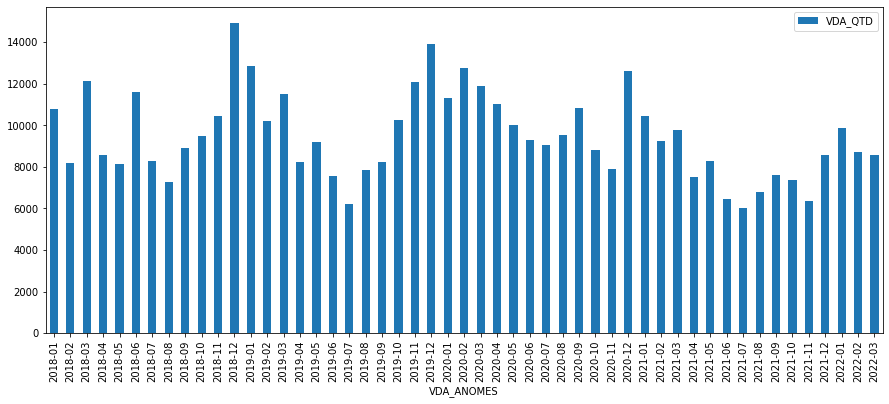

In [11]:
import matplotlib.pyplot as plt 

vendas['VDA_ANOMES'] = vendas['VDA_DATA'].dt.strftime('%Y-%m')
vendas.pivot_table(values = 'VDA_QTD', index = 'VDA_ANOMES', aggfunc='sum').plot(kind='bar', figsize=(15, 6))
#plt.tight_layout()
plt.show()

1.3.9. Plotar um gráfico de quantidade de vendas por dia da semana

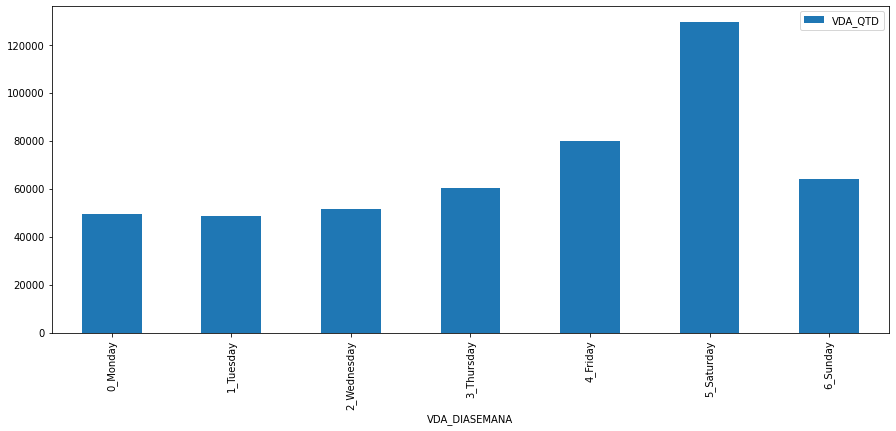

In [12]:
vendas['VDA_DIASEMANA'] = vendas['VDA_DATA'].dt.dayofweek.astype(str) +'_'+ vendas['VDA_DATA'].dt.day_name()
vendas.pivot_table(values = 'VDA_QTD', index = 'VDA_DIASEMANA', aggfunc='sum').plot(kind='bar', figsize=(15, 6))
#plt.tight_layout()
plt.show()

1.3.10. Plotar um gráfico de quantidade de vendas por semana do ano - semanas agrupadas

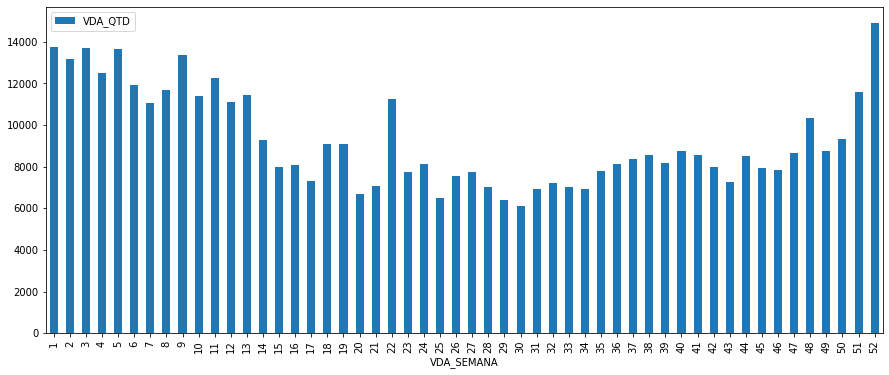

In [13]:
vendas['VDA_SEMANA'] = vendas['VDA_DATA'].dt.isocalendar().week
vendas["VDA_SEMANA"].replace({53: 52}, inplace=True)
vendas.pivot_table(values = 'VDA_QTD', index = 'VDA_SEMANA', aggfunc='sum').plot(kind='bar', figsize=(15, 6))
#plt.tight_layout()
plt.show()

1.3.11. Plotar um gráfico de quantidade de vendas por mês do ano - meses agrupados

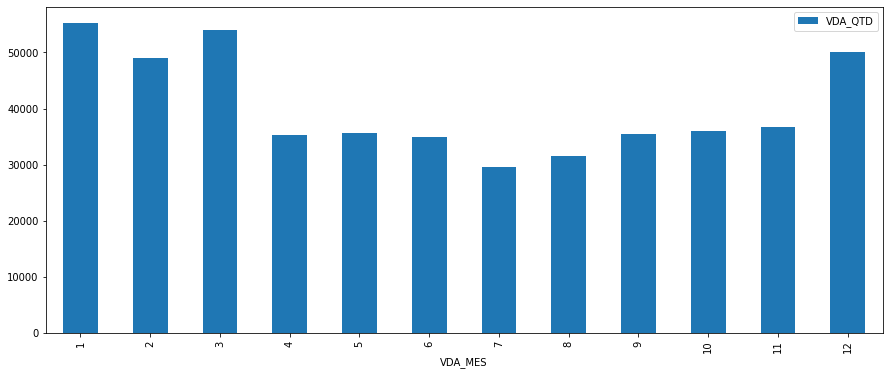

In [14]:
vendas['VDA_MES'] = vendas['VDA_DATA'].dt.month
vendas.pivot_table(values = 'VDA_QTD', index = 'VDA_MES', aggfunc='sum').plot(kind='bar', figsize=(15, 6))
#plt.tight_layout()
plt.show()

1.3.12. Plotar um gráfico de quantidade de vendas por semana do ano - semanas separadas

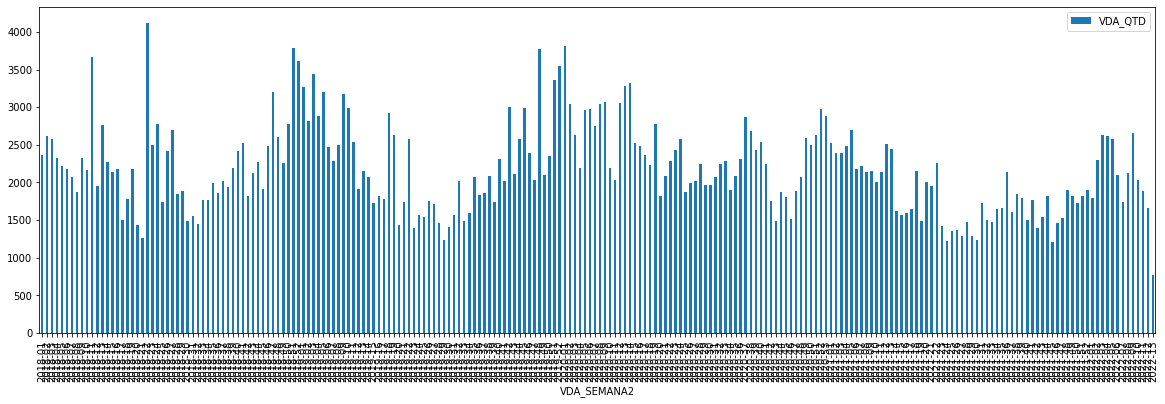

In [15]:
vendas['VDA_SEMANA2'] = vendas['VDA_DATA'].dt.isocalendar().week.astype(str).str.zfill(2)
vendas['VDA_SEMANA2'] = vendas['VDA_DATA'].dt.isocalendar().year.astype(str) +'-'+ vendas['VDA_SEMANA2']
vendas.pivot_table(values = 'VDA_QTD', index = 'VDA_SEMANA2', aggfunc='sum').sort_values(('VDA_SEMANA2'), ascending=True).plot(kind='bar', figsize=(20, 6))
#plt.tight_layout()
plt.show()

**1.4. Coleta dos Dados Meteorológicos**

1.4.1. Download dados meteorologicos do INMET

Necessário:
- baixar os arquivos zip para o drive
- ler o arquivo com o nome correto da cidade de Vitória (não está 100% padronizado entre os arquivos)
- converter para um dataframe (o formato de data não está 100% padronizado entre os arquivos)

In [16]:
from datetime import datetime

custom_date_parser_1 = lambda x: datetime.strptime(x, '%Y-%m-%d')
custom_date_parser_2 = lambda x: datetime.strptime(x, '%Y/%m/%d')

import requests
import zipfile

for ano in range(2018, 2023):

  file_url = f"https://portal.inmet.gov.br/uploads/dadoshistoricos/{ano}.zip"
  file_gdrive = f"INMET-{ano}.zip" 

  if not os.path.exists(file_gdrive):
    r = requests.get(file_url, stream = True)

    with open(file_gdrive, "wb") as file:
      for block in r.iter_content(chunk_size = 1024):
        if block:
          file.write(block)

  with zipfile.ZipFile(file_gdrive) as myzip:
    # print(myzip.namelist())
    if ano in [2018, 2019]:
      file_csv = f"{ano}/INMET_SE_ES_A612_VITORIA_01-01-{ano}_A_31-12-{ano}.CSV"
    elif ano in [2022]:
      file_csv = f"INMET_SE_ES_A612_VITORIA_01-01-{ano}_A_28-02-{ano}.CSV"
    else:
      file_csv = f"INMET_SE_ES_A612_VITORIA_01-01-{ano}_A_31-12-{ano}.CSV"
    print(file_csv)  

    with myzip.open(file_csv) as myfile:
        var_name = 'df_INMET_{}'.format(str(ano))
        if ano in [2018]:
          col = 'DATA (YYYY-MM-DD)'
          parser = custom_date_parser_1
          globals()[var_name] = pd.read_csv(myfile, sep=";", encoding = "ISO-8859-1", header=8, parse_dates=[col], date_parser=parser, decimal=",")
          globals()[var_name] = globals()[var_name][['DATA (YYYY-MM-DD)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']].rename(columns={"DATA (YYYY-MM-DD)": "ds", "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "precipitacao", "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)": "temperatura"})
        else:  
          col = 'Data'
          parser = custom_date_parser_2
          globals()[var_name] = pd.read_csv(myfile, sep=";", encoding = "ISO-8859-1", header=8, parse_dates=[col], date_parser=parser, decimal=",")
          globals()[var_name] = globals()[var_name][['Data', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']].rename(columns={"Data": "ds", "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "precipitacao", "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)": "temperatura"})
        

dados_meteor_all = pd.concat([globals()["df_INMET_2018"],globals()["df_INMET_2019"],globals()["df_INMET_2020"],globals()["df_INMET_2021"],globals()["df_INMET_2022"]])
dados_meteor_all

2018/INMET_SE_ES_A612_VITORIA_01-01-2018_A_31-12-2018.CSV
2019/INMET_SE_ES_A612_VITORIA_01-01-2019_A_31-12-2019.CSV
INMET_SE_ES_A612_VITORIA_01-01-2020_A_31-12-2020.CSV
INMET_SE_ES_A612_VITORIA_01-01-2021_A_31-12-2021.CSV
INMET_SE_ES_A612_VITORIA_01-01-2022_A_28-02-2022.CSV


,ds,precipitacao,temperatura
0,2018-01-01,2.2,25.1
1,2018-01-01,2.6,23.4
2,2018-01-01,1.2,23.3
3,2018-01-01,0.2,23.6
4,2018-01-01,0.0,23.4
...,...,...,...
1411,2022-02-28,0.0,29.9
1412,2022-02-28,0.0,28.9
1413,2022-02-28,0.0,27.7
1414,2022-02-28,0.0,27.2


1.4.2. Agrupar por data e fazer a média das colunas precipitação e temperatura

In [17]:
# Total de linhas da tabela de dados meteorológicos
#dados_meteor.head(30)
dados_meteor_all.count()

# tratamento de valores nulos
dados_meteor_all = dados_meteor_all.fillna({'precipitacao':0})
dados_meteor_all = dados_meteor_all.fillna({'temperatura':0})
# remoção de ocorrências com valores iguais ou inferiores a 0
dados_meteor_all = dados_meteor_all[dados_meteor_all['temperatura'] > 0]

dados_meteor = pd.pivot_table(
   dados_meteor_all,
   index=['ds'],
   aggfunc={'precipitacao': np.sum, 'temperatura': np.mean}
)

dados_meteor.head(30)

,precipitacao,temperatura
ds,,
2018-01-01,21.8,26.058333
2018-01-02,4.4,26.712500
2018-01-03,0.2,28.700000
2018-01-04,7.4,25.762500
2018-01-05,0.0,27.037500
2018-01-06,0.0,27.241667
2018-01-07,0.0,26.975000
2018-01-08,0.0,27.050000
2018-01-09,4.2,25.983333


1.4.3. Plotar um gráfico com a média de temperatura por data

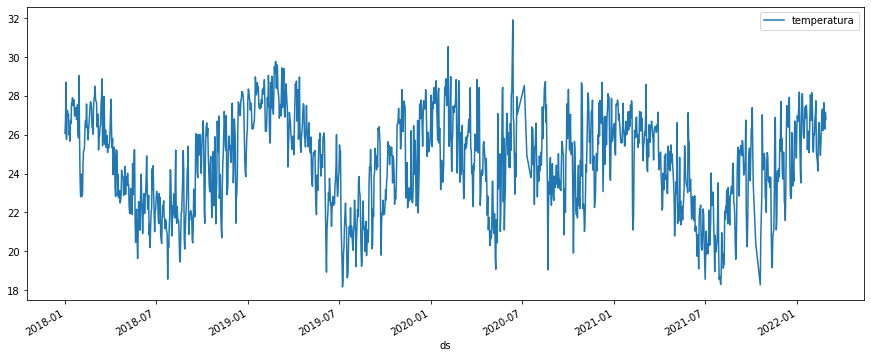

In [18]:
dados_meteor_temp = pd.pivot_table(
   dados_meteor_all,
   index=['ds'],
   aggfunc={'temperatura': np.mean}
)
dados_meteor_temp.plot(kind='line', figsize=(15, 6))
plt.show()

1.4.4. Plotar um gráfico de quantidade de vendas por mês do ano - meses agrupados

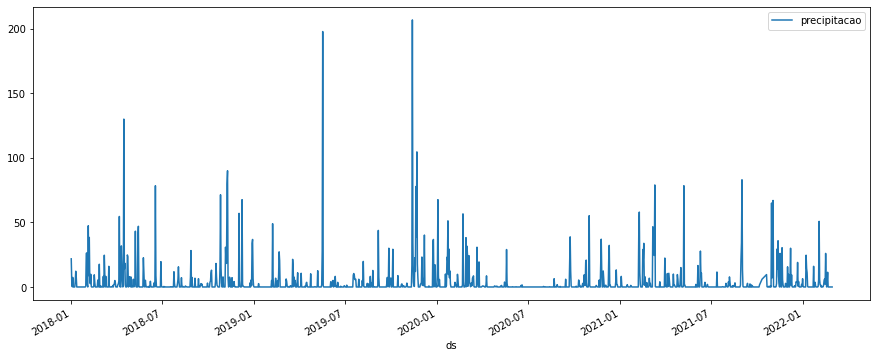

In [19]:
dados_meteor_temp = pd.pivot_table(
   dados_meteor_all,
   index=['ds'],
   aggfunc={'precipitacao': np.sum}
)
dados_meteor_temp.plot(kind='line', figsize=(15, 6))
plt.show()

# **2. Forecasting com SKTIME**

**sktime**

sktime fornece um framework de código aberto fácil de usar, flexível e modular para uma ampla variedade de tarefas de aprendizagem de máquina de séries temporais. Ele oferece interfaces compatíveis com scikit-learn e ferramentas de composição de modelos, com o objetivo de tornar o ecossistema mais utilizável e interoperável como um todo.

2.1. Importar módulos do sktime com todos os extras

In [20]:
pip install sktime[all_extras]

2.2. Agrupar as vendas por ano e mês no formato YYYY-MM e apresentar um gráfico com as partes de treinamento e teste

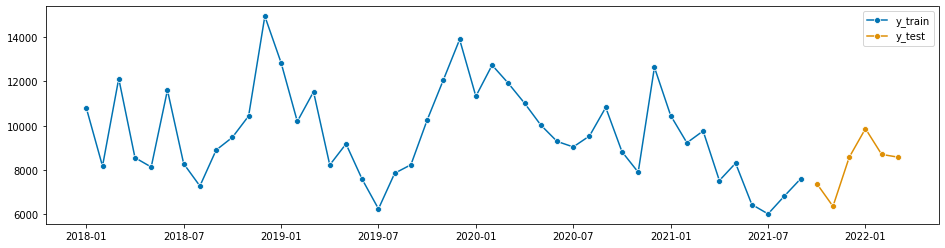

In [21]:
import warnings
warnings.simplefilter("ignore")

from sktime.forecasting.model_selection import temporal_train_test_split
#from sktime.utils.plotting.forecasting import plot_ys
from sktime.utils.plotting import plot_series

vendas_anomes = vendas[['VDA_ANOMES', 'VDA_QTD']]
vendas_anomes['VDA_AM'] = pd.to_datetime(vendas['VDA_ANOMES'], format='%Y-%m')
vendas_anomes

vendas_anomes = vendas_anomes.groupby(['VDA_AM', 'VDA_ANOMES']).sum().reset_index()
vendas_anomes = vendas_anomes[['VDA_AM', 'VDA_ANOMES', 'VDA_QTD']]
vendas_anomes


# adicionar linhas inexistentes
for ano in range(2018, 2023):
  for mes in range(1, 13):
    if ano == 2022 and mes > 3:
      break
    ano_mes = str(ano)+'-'+str(mes).zfill(2)
    #print(ano_mes)
    i = vendas_anomes.query("VDA_ANOMES == '"+ano_mes+"'")
    if i.empty:
      #print(ano_mes)
      vendas_anomes = vendas_anomes.append({'VDA_AM': pd.to_datetime(ano_mes, format='%Y-%m'), 'VDA_ANOMES': ano_mes, 'VDA_QTD': 0}, ignore_index=True)

index = pd.period_range(start='2018-01-01', end='2022-03-01', freq='M')
index

y = pd.Series(vendas_anomes['VDA_QTD'].values, index=index)
y = y.sort_index() # This is an important step if 'time' field is not sorted

#y.head()

y_train, y_test = temporal_train_test_split(y, test_size=0.1) #default 0.25 = 25%
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

2.3. Apresentar um gráfico com as partes de treinamento e teste sem agrupar as vendas

In [22]:
# vendas_datas = vendas[['VDA_DATA', 'VDA_QTD']]

# y = pd.Series(vendas_datas['VDA_QTD'].values, index=vendas_datas['VDA_DATA'].values)
# y = y.sort_index() # This is an important step if 'time' field is not sorted

# y_train, y_test = temporal_train_test_split(y, test_size=0.1) #default 0.25 = 25%
# plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [23]:
y

2018-01    10807.0
2018-02     8169.0
2018-03    12132.0
2018-04     8552.0
2018-05     8129.0
2018-06    11608.0
2018-07     8280.0
2018-08     7270.0
2018-09     8897.0
2018-10     9472.0
2018-11    10438.0
2018-12    14951.0
2019-01    12850.0
2019-02    10191.0
2019-03    11533.0
2019-04     8222.0
2019-05     9176.0
2019-06     7569.0
2019-07     6237.0
2019-08     7849.0
2019-09     8233.0
2019-10    10256.0
2019-11    12074.0
2019-12    13901.0
2020-01    11329.0
2020-02    12740.0
2020-03    11918.0
2020-04    11017.0
2020-05    10029.0
2020-06     9289.0
2020-07     9038.0
2020-08     9535.0
2020-09    10824.0
2020-10     8823.0
2020-11     7896.0
2020-12    12641.0
2021-01    10460.0
2021-02     9225.0
2021-03     9761.0
2021-04     7517.0
2021-05     8303.0
2021-06     6434.0
2021-07     6008.0
2021-08     6812.0
2021-09     7592.0
2021-10     7381.0
2021-11     6352.0
2021-12     8570.0
2022-01     9865.0
2022-02     8700.0
2022-03     8577.0
Freq: M, dtype: float64

2.4. Algumas importações do SKTIME

In [24]:
# usar mesmas métricas que visualizaremos também mais à frente no outro algoritmo Facebook Prophet
# mse 	rmse 	mae 	mape 	mdape
# https://www.sktime.org/en/stable/api_reference/performance_metrics.html

# Mean squared error (MSE) or root mean squared error (RMSE).
from sktime.performance_metrics.forecasting import MeanSquaredError

# MAE Mean absolute error (MAE).
from sktime.performance_metrics.forecasting import MeanAbsoluteError
# MAPE Mean absolute percentage error (MAPE) or symmetric version.
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
# Median absolute percentage error (MdAPE) or symmetric version.
from sktime.performance_metrics.forecasting import MedianAbsolutePercentageError

from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter

mse = MeanSquaredError(square_root=False)
rmse = MeanSquaredError(square_root=True)
mae = MeanAbsoluteError()
mape = MeanAbsolutePercentageError(symmetric=False)
mdape = MedianAbsolutePercentageError(symmetric=False)



In [25]:
#fh = ForecastingHorizon(y_test.index, is_relative=False,)
#fh = np.array([1, 2, 3, 4, 5]) 
fh = np.arange(len(y_test)) + 1
fh

array([1, 2, 3, 4, 5, 6])

2.4. Modelo NaiveForecaster

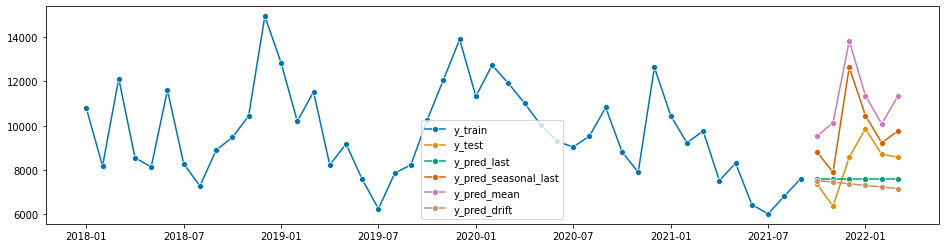

In [26]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

# Naive Forecaster com estratégia ''last''
naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

# Naive Forecaster com estratégia ''last'' e sp
naive_forecaster_seasonal_last = NaiveForecaster(strategy="last", sp = 12)
naive_forecaster_seasonal_last.fit(y_train)
y_seasonal_last = naive_forecaster_seasonal_last.predict(fh)

# Naive Forecaster com estratégia ''mean''
naive_forecaster_mean = NaiveForecaster(strategy="mean", sp=12)
naive_forecaster_mean.fit(y_train)
y_mean = naive_forecaster_mean.predict(fh)

# Naive Forecaster com estratégia ''drift''
naive_forecaster_drift = NaiveForecaster(strategy="drift")
naive_forecaster_drift.fit(y_train)
y_drift = naive_forecaster_drift.predict(fh)

plot_series(y_train, y_test, y_last, y_seasonal_last, y_mean, y_drift, labels=["y_train", "y_test", "y_pred_last", "y_pred_seasonal_last", "y_pred_mean", "y_pred_drift"]);

MSE, RMSE, MAE, MAPE, MDAPE - NaiveForecaster

In [27]:
print('mse / rmse / mae / mape / mdape')

print(*['Estratégia last: ', 'mse =', mse(y_test, y_last), 'rmse =', rmse(y_test, y_last), 'mae =', mae(y_test, y_last), 'mape =', mape(y_test, y_last), 'mdape =', mdape(y_test, y_last)])
print(*['Estratégia seasonal last: ', 'mse =', mse(y_test, y_seasonal_last), 'rmse =', rmse(y_test, y_seasonal_last), 'mae =', mae(y_test, y_seasonal_last), 'mape =', mape(y_test, y_seasonal_last), 'mdape =', mdape(y_test, y_seasonal_last)])
print(*['Estratégia mean: ', 'mse =', mse(y_test, y_mean), 'rmse =', rmse(y_test, y_mean), 'mae =', mae(y_test, y_mean), 'mape =', mape(y_test, y_mean), 'mdape =', mdape(y_test, y_mean)])
print(*['Estratégia drift: ', 'mse =', mse(y_test, y_drift), 'rmse =', rmse(y_test, y_drift), 'mae =', mae(y_test, y_drift), 'mape =', mape(y_test, y_drift), 'mdape =', mdape(y_test, y_drift)])

mse / rmse / mae / mape / mdape
Estratégia last:  mse = 1650503.8333333333 rmse = 1284.7193597565708 mae = 1132.5 mape = 0.13508815358118273 mdape = 0.12109917059658348
Estratégia seasonal last:  mse = 3844641.1666666665 rmse = 1960.775654343624 mae = 1560.1666666666667 mape = 0.19536189595684195 mdape = 0.16670504324833035
Estratégia mean:  mse = 9719786.302083334 rmse = 3117.6571816162427 mae = 2802.9583333333335 mape = 0.3551886246532183 mdape = 0.30553296320901324
Estratégia drift:  mse = 2237718.767475895 rmse = 1495.9006542801883 mae = 1315.1704545454543 mape = 0.15432269144654268 mdape = 0.1676530259902641


2.5. Modelo AUTOARIMA

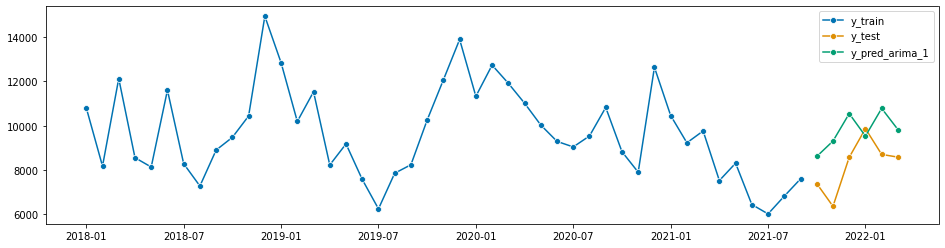

In [28]:
from sktime.forecasting.arima import AutoARIMA

arima_1 = AutoARIMA(sp=12, suppress_warnings=True)
arima_1.fit(y_train)
y_arima_1 = arima_1.predict(fh)

plot_series(y_train, y_test, y_arima_1, labels=["y_train", "y_test", "y_pred_arima_1"]);

MSE, RMSE, MAE, MAPE, MDAPE - AUTOARIMA

In [29]:
print('mse / rmse / mae / mape / mdape')

print(*['AUTOARIMA: ', 'mse =', mse(y_test, y_arima_1), 'rmse =', rmse(y_test, y_arima_1), 'mae =', mae(y_test, y_arima_1), 'mape =', mape(y_test, y_arima_1), 'mdape =', mdape(y_test, y_arima_1)])

mse / rmse / mae / mape / mdape
AUTOARIMA:  mse = 3354585.158853576 rmse = 1831.552663412542 mae = 1636.411052208898 mape = 0.2133591018233666 mdape = 0.1983584851022953


2.6. Modelo AUTOETS

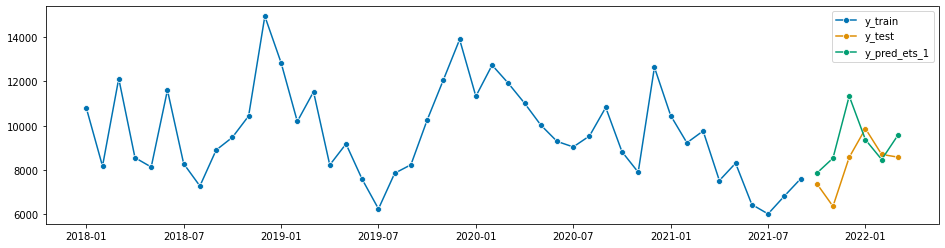

In [30]:
from sktime.forecasting.ets import AutoETS

ets_1 = AutoETS(auto=True, sp=12, n_jobs=-1)
ets_1.fit(y_train)
y_ets_1 = ets_1.predict(fh)

plot_series(y_train, y_test, y_ets_1, labels=["y_train", "y_test", "y_pred_ets_1"]);

MSE, RMSE, MAE, MAPE, MDAPE - AUTOETS

In [31]:
print('mse / rmse / mae / mape / mdape')

print(*['AUTOETS: ', 'mse =', mse(y_test, y_ets_1), 'rmse =', rmse(y_test, y_ets_1), 'mae =', mae(y_test, y_ets_1), 'mape =', mape(y_test, y_ets_1), 'mdape =', mdape(y_test, y_ets_1)])

mse / rmse / mae / mape / mdape
AUTOETS:  mse = 2320076.9303113893 rmse = 1523.1798745753533 mae = 1190.0495075604183 mape = 0.15377171939970735 mdape = 0.08959160215578593


2.7. Modelo BATS

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

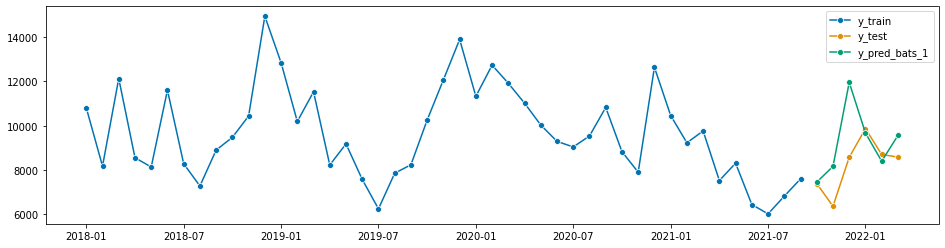

In [32]:
from sktime.forecasting.bats import BATS
from sktime.forecasting.base import ForecastingHorizon

bats_1 = BATS(sp=12, use_trend=True, use_box_cox=False)
bats_1.fit(y_train)
y_bats_1 = bats_1.predict(fh)

plot_series(y_train, y_test, y_bats_1, labels=["y_train", "y_test", "y_pred_bats_1"])

MSE, RMSE, MAE, MAPE, MDAPE - BATS

In [33]:
print('mse / rmse / mae / mape / mdape')

print(*['BATS: ', 'mse =', mse(y_test, y_bats_1), 'rmse =', rmse(y_test, y_bats_1), 'mae =', mae(y_test, y_bats_1), 'mape =', mape(y_test, y_bats_1), 'mdape =', mdape(y_test, y_bats_1)])

mse / rmse / mae / mape / mdape
BATS:  mse = 2639365.6143308575 rmse = 1624.61245050346 mae = 1123.943340548947 mape = 0.1430045258708067 mdape = 0.07476259722233002


2.8. Modelo Exponential Smoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


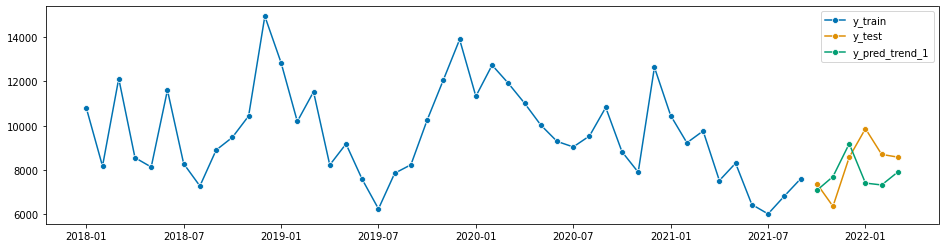

In [34]:
from sktime.forecasting.exp_smoothing  import ExponentialSmoothing

trend_1 = ExponentialSmoothing(trend='mul', seasonal='mul', sp=6)
trend_1.fit(y_train)
y_trend_1 = trend_1.predict(fh)

plot_series(y_train, y_test, y_trend_1, labels=["y_train", "y_test", "y_pred_trend_1"]);

MSE, RMSE, MAE, MAPE, MDAPE - Exponential Smoothing

In [35]:
print('mse / rmse / mae / mape / mdape')

print(*['Exponential Smoothing: ', 'mse =', mse(y_test, y_trend_1), 'rmse =', rmse(y_test, y_trend_1), 'mae =', mae(y_test, y_trend_1), 'mape =', mape(y_test, y_trend_1), 'mdape =', mdape(y_test, y_trend_1)])

mse / rmse / mae / mape / mdape
Exponential Smoothing:  mse = 1784011.121345747 rmse = 1335.6687917840063 mae = 1130.5183746311423 mape = 0.13532471609817434 mdape = 0.11846163206620167


2.9. Modelo Prophet

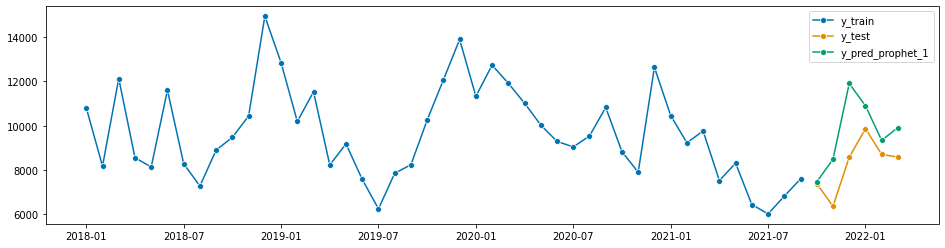

In [36]:
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.base import ForecastingHorizon

y2_train, y2_test = temporal_train_test_split(y, test_size=0.1)
fh2 = ForecastingHorizon(y2_test.index, is_relative=False)

# Convert index to pd.DatetimeIndex
z = y.copy()
z = z.to_timestamp(freq="M")
z_train, z_test = temporal_train_test_split(z, test_size=0.1)

prophet_1 = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y2_train) / 12),
    add_country_holidays={"country_name": "Brazil"},
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
)

prophet_1.fit(z_train)
y_prophet_1 = prophet_1.predict(fh2.to_relative(cutoff=y2_train.index[-1]))
y_prophet_1.index = y2_test.index

plot_series(y2_train, y2_test, y_prophet_1, labels=["y_train", "y_test", "y_pred_prophet_1"]);

MSE, RMSE, MAE, MAPE, MDAPE - Prophet

In [37]:
print('mse / rmse / mae / mape / mdape')

print(*['Prophet: ', 'mse =', mse(y_test, y_prophet_1), 'rmse =', rmse(y_test, y_prophet_1), 'mae =', mae(y_test, y_prophet_1), 'mape =', mape(y_test, y_prophet_1), 'mdape =', mdape(y_test, y_prophet_1)])

mse / rmse / mae / mape / mdape
Prophet:  mse = 3157356.6601616773 rmse = 1776.8952304966315 mae = 1425.3746326991777 mape = 0.17815398557104434 mdape = 0.13045526120176212


# **3. Forecasting com Facebook Prophet e Dados Meteorológicos**

O Prophet é um procedimento para prever dados de séries temporais com base em um modelo aditivo em que as tendências não lineares são ajustadas à sazonalidade anual, semanal e diária, além dos efeitos de feriados. Funciona melhor com séries temporais com fortes efeitos sazonais e várias temporadas de dados históricos. O Prophet é robusto a dados ausentes e mudanças na tendência e normalmente lida bem com valores discrepantes.

O Prophet é um software de código aberto lançado pela equipe Core Data Science do Facebook. Está disponível para download no CRAN e no PyPI.

3.1. Instalar o facebook prophet, se necessário

In [38]:
#pip install pystan==2.19.1.1

!pip install prophet

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

3.2. Merge dos dados meteorológicos com o dataframe de vendas

In [39]:
df_p2 = vendas[['VDA_DATA', 'VDA_QTD']].rename(columns={"VDA_DATA": "ds", "VDA_QTD": "y"}).sort_values(by=['ds'])

df_p2 = df_p2[df_p2['ds'] <= '2022-02-28']

df_p2 = df_p2.merge(dados_meteor, on='ds', how='left').fillna({'y':0})

df_p2 = df_p2.fillna({'precipitacao':0})
df_p2 = df_p2.fillna({'temperatura':0})

df_p2.loc[df_p2['temperatura'] == np.NaN, 'sensacao'] = 0 #'indisponivel'
df_p2.loc[df_p2['temperatura'] <= 0, 'sensacao'] = 0 #'indisponivel'
df_p2.loc[df_p2['temperatura'] > 0, 'sensacao'] = 1 # 'frio'
df_p2.loc[df_p2['temperatura'] >= 20, 'sensacao'] = 2 # 'agradavel'
df_p2.loc[df_p2['temperatura'] >= 30, 'sensacao'] = 3 # 'quente'
df_p2.loc[df_p2['temperatura'] >= 35, 'sensacao'] = 4 # 'muito quente'

df_p2.style

,ds,y,precipitacao,temperatura,sensacao
0,2018-01-02 00:00:00,376.000000,4.400000,26.712500,2.000000
1,2018-01-03 00:00:00,411.000000,0.200000,28.700000,2.000000
2,2018-01-04 00:00:00,321.000000,7.400000,25.762500,2.000000
3,2018-01-05 00:00:00,463.000000,0.000000,27.037500,2.000000
4,2018-01-06 00:00:00,789.000000,0.000000,27.241667,2.000000
5,2018-01-08 00:00:00,401.000000,0.000000,27.050000,2.000000
6,2018-01-09 00:00:00,332.000000,4.200000,25.983333,2.000000
7,2018-01-10 00:00:00,349.000000,12.200000,26.154167,2.000000
8,2018-01-11 00:00:00,362.000000,7.600000,25.666667,2.000000
9,2018-01-12 00:00:00,459.000000,0.000000,26.733333,2.000000


3.3. Procurar Melhores Parâmetros

In [40]:
import itertools

# usado no Hyperparameter tuning
df_p0 = df_p2

param_grid = {  
    'changepoint_prior_scale': [ 0.05, 0.07, 0.08, 0.1],
    #'holidays_prior_scale'   : [0.01,  0.1,   5.0,  10.0],
    'seasonality_prior_scale': [0.05,  0.1,  0.5, 5.0, 7.0, 10.0]
    #'seasonality_mode'       : ['multiplicative', 'additive']
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
maes = []
mapes = []

index = 0
# Use cross validation to evaluate all parameters
for params in all_params:
    index += 1
    print(index)
    p0 = Prophet(
                growth='linear',
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                holidays=None,
                seasonality_mode='multiplicative',
                #seasonality_prior_scale=5,
                #holidays_prior_scale=10,
                #changepoint_prior_scale=.001,
                mcmc_samples=0,        
                **params
                ).add_seasonality(name='monthly',
                                  period=30.5,
                                  fourier_order=3,
                                  #prior_scale=10,
                                  mode='additive')
                
    # .add_seasonality(name='yearly',
    #                                period=365.25,
    #                                fourier_order=5,
    #                                #prior_scale=0.1,
    #                                mode='additive')
                
                                   
    #p0.add_country_holidays(country_name='Brazil')
    p0.add_regressor('precipitacao')
    p0.add_regressor('temperatura')
    p0.add_regressor('sensacao')
    p0.fit(df_p0)  # Fit model with given params
    #df_cv_p0 = cross_validation(p0, cutoffs=cutoffs, horizon='90 days', parallel="processes")
    #df_cv_p0 = cross_validation(p0, initial='1460 days', period='365 days', horizon = '30 days', parallel="processes")
    df_cv_p0 = cross_validation(p0, period='365 days', horizon = '30 days', parallel="processes")
    df_p = performance_metrics(df_cv_p0, rolling_window=0.2)
    rmses.append(df_p['rmse'].values[0])
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['mae'] = maes
tuning_results['mape'] = mapes

1


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f0a76050>


2


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f0092290>


3


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1312bd2a10>


4


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f13129ad3d0>


5


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301c84a50>


6


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f0092290>


7


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301c36810>


8


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f0a95b90>


9


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f0ab8d10>


10


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f0a9f1d0>


11


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f0a95b90>


12


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f50a6550>


13


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301c00f10>


14


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12effb5dd0>


15


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1302681850>


16


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f00a2090>


17


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f289add0>


18


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301c34fd0>


19


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12effbded0>


20


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12f00a2cd0>


21


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301e19410>


22


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301c8e950>


23


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301bba4d0>


24


INFO:prophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1301c361d0>


3.4. Apresentação das análises com diferentes parametrizações

In [51]:
#tuning_results.head(150)
#display(tuning_results)

tuning_results.style

,changepoint_prior_scale,seasonality_prior_scale,rmse,mae,mape
0,0.050000,0.050000,63.040120,48.702162,0.129403
1,0.050000,0.100000,57.492494,44.885386,0.114815
2,0.050000,0.500000,56.156391,43.330233,0.108701
3,0.050000,5.000000,56.590612,43.630068,0.109221
4,0.050000,7.000000,56.230505,43.503679,0.109241
5,0.050000,10.000000,56.600897,43.667626,0.109398
6,0.070000,0.050000,62.075614,48.114181,0.128157
7,0.070000,0.100000,57.259698,45.483716,0.116681
8,0.070000,0.500000,55.133560,43.623941,0.110343
9,0.070000,5.000000,55.016915,43.555806,0.110190


3.5. Fit

In [52]:
p2 = Prophet(growth='linear',
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            holidays=None,
            seasonality_mode='multiplicative',
            seasonality_prior_scale=0.5,
            #holidays_prior_scale=5,
            changepoint_prior_scale=.05,
            mcmc_samples=0
            ).add_seasonality(name='monthly',
                                  period=30.5,
                                  fourier_order=3,
                                  #prior_scale=10,
                                  mode='additive')
            
            # .add_seasonality(name='yearly',
            #                        period=365.25,
            #                        fourier_order=3,
            #                        #prior_scale=0.1,
            #                        mode='multiplicative')

                 
#p2.add_country_holidays(country_name='Brazil')
p2.add_regressor('precipitacao')
p2.add_regressor('temperatura')
p2.add_regressor('sensacao')

p2.fit(df_p2)

3.6. Previsão de vendas

In [53]:
future_p2 = df_p2

forecast_p2 = p2.predict(future_p2)
forecast_p2[forecast_p2['ds'] >= '2022-01-01']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_multiplicative,...,temperatura,temperatura_lower,temperatura_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1394,2022-01-02,247.166730,310.865819,595.478381,247.166730,247.166730,53.007766,53.007766,53.007766,0.039334,...,0.040558,0.040558,0.040558,0.186576,0.186576,0.186576,0.418958,0.418958,0.418958,459.564379
1395,2022-01-03,246.999217,195.617687,454.478169,246.999217,246.999217,43.911333,43.911333,43.911333,0.035655,...,0.036879,0.036879,0.036879,-0.322159,-0.322159,-0.322159,0.400150,0.400150,0.400150,318.981113
1396,2022-01-04,246.831705,169.413572,421.934109,246.831705,246.831705,28.308461,28.308461,28.308461,0.040519,...,0.041743,0.041743,0.041743,-0.327508,-0.327508,-0.327508,0.379158,0.379158,0.379158,297.890431
1397,2022-01-05,246.664192,149.966972,413.367448,246.664192,246.664192,9.870007,9.870007,9.870007,0.046764,...,0.047989,0.047989,0.047989,-0.285481,-0.285481,-0.285481,0.356344,0.356344,0.356344,285.548561
1398,2022-01-06,246.496679,159.312318,431.805836,246.496679,246.496679,-7.186347,-7.186347,-7.186347,0.055718,...,0.056942,0.056942,0.056942,-0.176865,-0.176865,-0.176865,0.332100,0.332100,0.332100,291.309629
1399,2022-01-07,246.329167,193.271211,458.516505,246.329167,246.329167,-19.370125,-19.370125,-19.370125,-0.025283,...,0.023449,0.023449,0.023449,0.119411,0.119411,0.119411,0.306840,0.306840,0.306840,325.729270
1400,2022-01-08,246.161654,350.519892,612.593770,246.161654,246.161654,-24.913423,-24.913423,-24.913423,-0.025537,...,0.003496,0.003496,0.003496,0.806026,0.806026,0.806026,0.280992,0.280992,0.280992,482.544122
1401,2022-01-09,245.994142,197.847279,456.249697,245.994142,245.994142,-24.161460,-24.161460,-24.161460,-0.027538,...,-0.005071,-0.005071,-0.005071,0.186576,0.186576,0.186576,0.254987,0.254987,0.254987,323.680207
1402,2022-01-10,245.826629,86.076125,342.350240,245.826629,245.826629,-19.249695,-19.249695,-19.249695,0.032617,...,0.035000,0.035000,0.035000,-0.322159,-0.322159,-0.322159,0.229253,0.229253,0.229253,211.756245
1403,2022-01-11,245.659116,83.706639,351.754437,245.659116,245.659116,-13.210901,-13.210901,-13.210901,0.050136,...,0.051360,0.051360,0.051360,-0.327508,-0.327508,-0.327508,0.204203,0.204203,0.204203,214.473535


3.7. Plotar um gráfico com a previsão de vendas

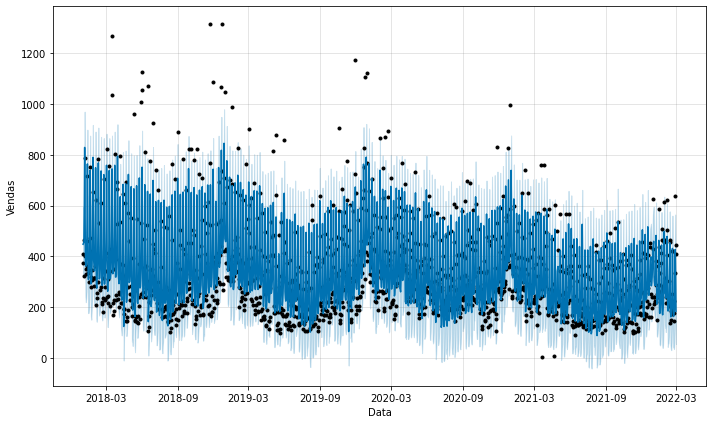

In [54]:
fig1_p2 = p2.plot(forecast_p2, xlabel='Data', ylabel='Vendas')

3.8. Plotar um gráfico com os componentes da previsão de vendas

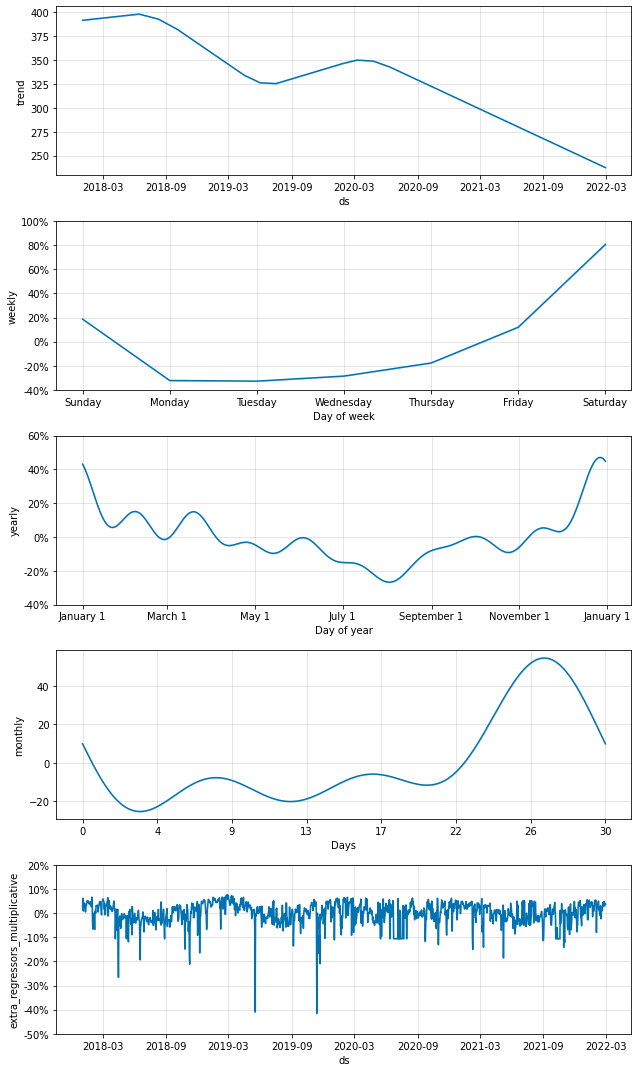

In [55]:
fig2_p2 = p2.plot_components(forecast_p2)

3.9. Validação e métricas de performance

In [56]:
from fbprophet.diagnostics import cross_validation
df_cv_p2 = cross_validation(p2, period='365 days', horizon = '30 days', parallel="processes")
df_cv_p2.style

INFO:fbprophet:Making 4 forecasts with cutoffs between 2019-01-30 00:00:00 and 2022-01-29 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f12efbc5810>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-31 00:00:00,466.862298,313.767009,631.158961,433.000000,2019-01-30 00:00:00
1,2019-02-01 00:00:00,587.505780,434.025448,745.938363,477.000000,2019-01-30 00:00:00
2,2019-02-02 00:00:00,883.445588,724.910383,1040.996573,827.000000,2019-01-30 00:00:00
3,2019-02-03 00:00:00,503.077049,333.452231,669.519855,409.000000,2019-01-30 00:00:00
4,2019-02-04 00:00:00,337.645816,189.201234,498.794319,310.000000,2019-01-30 00:00:00
5,2019-02-05 00:00:00,251.794520,93.105620,408.906449,199.000000,2019-01-30 00:00:00
6,2019-02-06 00:00:00,276.921292,120.380068,453.566670,278.000000,2019-01-30 00:00:00
7,2019-02-07 00:00:00,303.604186,155.094707,466.124339,276.000000,2019-01-30 00:00:00
8,2019-02-08 00:00:00,468.698455,317.235371,625.950526,373.000000,2019-01-30 00:00:00
9,2019-02-09 00:00:00,817.770163,657.258305,980.704958,643.000000,2019-01-30 00:00:00


In [57]:
from fbprophet.diagnostics import performance_metrics
df_perf_p2 = performance_metrics(df_cv_p2)
df_perf_p2.style

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days 00:00:00,4269.508690,65.341478,54.485762,0.111546,0.087706,1.000000
1,4 days 00:00:00,3575.972901,59.799439,48.087541,0.105606,0.087706,1.000000
2,5 days 00:00:00,1960.877500,44.281796,34.831865,0.097024,0.076080,1.000000
3,6 days 00:00:00,2037.571776,45.139470,32.174705,0.105855,0.075854,1.000000
4,7 days 00:00:00,4840.718929,69.575275,46.780587,0.124439,0.112654,0.916667
5,8 days 00:00:00,11403.615178,106.787711,75.429325,0.159666,0.162830,0.750000
6,9 days 00:00:00,12924.343800,113.685284,89.619349,0.183061,0.193473,0.750000
7,10 days 00:00:00,15615.621157,124.962479,101.691043,0.210753,0.238565,0.666667
8,11 days 00:00:00,9229.328305,96.069393,75.431804,0.185661,0.182321,0.833333
9,12 days 00:00:00,8160.694471,90.336562,61.702524,0.177710,0.126808,0.833333


4.0. Plotar um gráfico com a métrica de performance MAE e MAPE

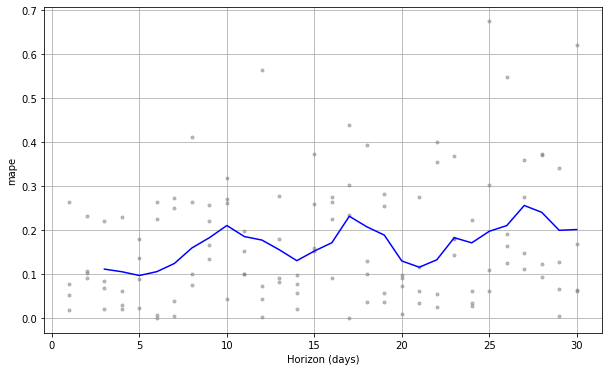

In [94]:
from fbprophet.plot import plot_cross_validation_metric
fig3_p2 = plot_cross_validation_metric(df_cv_p2, metric='mape')


4.1. Plotar um gráfico de comparação entre previsto e real nos períodos analisados

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

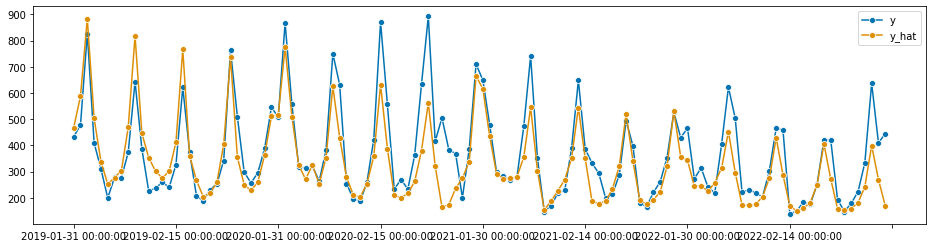

In [92]:
pht_y = pd.Series(df_cv_p2['y'].values, index=df_cv_p2['ds'].values)
pht_y = pht_y.sort_index() # This is an important step if 'time' field is not sorted

pht_y_hat = pd.Series(df_cv_p2['yhat'].values, index=df_cv_p2['ds'].values)
pht_y_hat = pht_y_hat.sort_index() # This is an important step if 'time' field is not sorted

plot_series(pht_y, pht_y_hat, labels=["y", "y_hat"])

4.2 Plotar um gráfico de comparação entre o valor real e os valores previstos possíveis para mínimo e máximo, nos períodos analisados

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

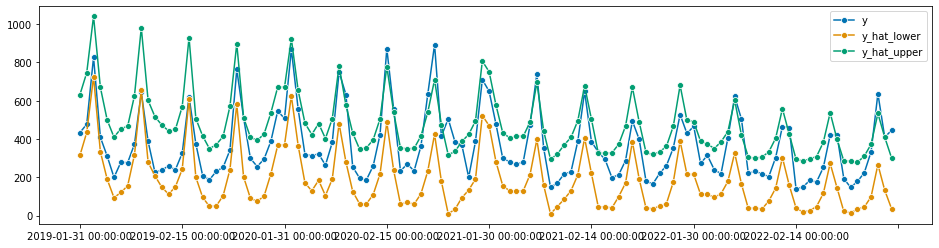

In [93]:
pht_y = pd.Series(df_cv_p2['y'].values, index=df_cv_p2['ds'].values)
pht_y = pht_y.sort_index() # This is an important step if 'time' field is not sorted

pht_y_hat_lower = pd.Series(df_cv_p2['yhat_lower'].values, index=df_cv_p2['ds'].values)
pht_y_hat_lower = pht_y_hat_lower.sort_index() # This is an important step if 'time' field is not sorted

pht_y_hat_upper = pd.Series(df_cv_p2['yhat_upper'].values, index=df_cv_p2['ds'].values)
pht_y_hat_upper = pht_y_hat_upper.sort_index() # This is an important step if 'time' field is not sorted

plot_series(pht_y, pht_y_hat_lower, pht_y_hat_upper, labels=["y", "y_hat_lower", "y_hat_upper"])